In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yaml
import os 
import tqdm
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
sns.set_theme(style="white", context="talk", palette="muted")
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 14,         
    'axes.titlesize': 15,
    'axes.labelsize': 13,    
    'legend.fontsize': 11,   
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'figure.dpi': 100
})

In [64]:
# Read config.yaml
with open('../configs/config_kandi.yaml', 'r') as config_file:
    config = yaml.safe_load(config_file)

# extract data params
data_params = config['data_params']

### Read the csv file

In [5]:
dataset_path = data_params['data_path'] + 'raw/' + data_params['dataset']
data = pd.read_csv(dataset_path)  
data.head()

,DATE,PS,T2M,RH2M,WD2M,WS2M,GWETPROF,CLOUD_AMT,TOA_SW_DWN,PRECTOTCORR_SUM,ALLSKY_SFC_SW_DWN,SPI6
0,31/1/1981,97.89,21.77,40.88,56.19,2.44,0.54,NaN,NaN,0.00,NaN,NaN
1,28/2/1981,97.71,25.98,32.81,75.69,2.34,0.50,NaN,NaN,0.00,NaN,NaN
2,31/3/1981,97.62,29.63,41.81,136.56,2.16,0.48,NaN,NaN,5.27,NaN,NaN
3,30/4/1981,97.53,30.55,54.06,209.44,2.59,0.46,NaN,NaN,47.46,NaN,NaN
4,31/5/1981,97.72,28.02,71.69,223.00,2.32,0.47,NaN,NaN,89.65,NaN,NaN


In [6]:
dataset_path

'../datasets/raw/Kandi_with_SPI6.csv'

In [7]:
# Ensure the date column is a datetime
data['DATE'] = pd.to_datetime(data['DATE'], dayfirst=True)

# Set the date column as the index and drop it from the columns
data = data.set_index('DATE')

data.head()

,PS,T2M,RH2M,WD2M,WS2M,GWETPROF,CLOUD_AMT,TOA_SW_DWN,PRECTOTCORR_SUM,ALLSKY_SFC_SW_DWN,SPI6
DATE,,,,,,,,,,,
1981-01-31,97.89,21.77,40.88,56.19,2.44,0.54,NaN,NaN,0.00,NaN,NaN
1981-02-28,97.71,25.98,32.81,75.69,2.34,0.50,NaN,NaN,0.00,NaN,NaN
1981-03-31,97.62,29.63,41.81,136.56,2.16,0.48,NaN,NaN,5.27,NaN,NaN
1981-04-30,97.53,30.55,54.06,209.44,2.59,0.46,NaN,NaN,47.46,NaN,NaN
1981-05-31,97.72,28.02,71.69,223.00,2.32,0.47,NaN,NaN,89.65,NaN,NaN


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 492 entries, 1981-01-31 to 2021-12-31
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PS                 492 non-null    float64
 1   T2M                492 non-null    float64
 2   RH2M               492 non-null    float64
 3   WD2M               492 non-null    float64
 4   WS2M               492 non-null    float64
 5   GWETPROF           492 non-null    float64
 6   CLOUD_AMT          456 non-null    float64
 7   TOA_SW_DWN         456 non-null    float64
 8   PRECTOTCORR_SUM    492 non-null    float64
 9   ALLSKY_SFC_SW_DWN  456 non-null    float64
 10  SPI6               487 non-null    float64
dtypes: float64(11)
memory usage: 46.1 KB


In [9]:
data.describe()

,PS,T2M,RH2M,WD2M,WS2M,GWETPROF,CLOUD_AMT,TOA_SW_DWN,PRECTOTCORR_SUM,ALLSKY_SFC_SW_DWN,SPI6
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,456.000000,456.000000,492.000000,456.000000,4.870000e+02
mean,97.768984,27.118679,56.888476,155.975386,2.113069,0.505366,49.743224,35.247237,74.022581,20.531031,-1.400659e-15
std,0.144170,2.561134,21.252746,67.044522,0.482917,0.069640,19.380463,2.661197,91.334375,1.601459,1.000000e+00
min,97.330000,20.900000,16.060000,25.620000,1.210000,0.420000,10.450000,30.230000,0.000000,15.840000,-1.435643e+00
25%,97.670000,25.427500,38.000000,79.560000,1.717500,0.450000,31.760000,33.455000,0.000000,19.380000,-9.525170e-01
50%,97.800000,26.345000,58.095000,192.590000,2.145000,0.480000,55.355000,36.680000,26.370000,20.645000,3.916189e-02
75%,97.870000,29.007500,77.955000,214.327500,2.460000,0.542500,65.800000,37.357500,143.700000,21.635000,9.037346e-01
max,98.190000,33.760000,87.000000,284.310000,3.600000,0.780000,84.090000,37.880000,416.600000,25.260000,2.361630e+00


In [10]:
data.isnull().sum()

PS                    0
T2M                   0
RH2M                  0
WD2M                  0
WS2M                  0
GWETPROF              0
CLOUD_AMT            36
TOA_SW_DWN           36
PRECTOTCORR_SUM       0
ALLSKY_SFC_SW_DWN    36
SPI6                  5
dtype: int64

In [11]:
data.isnull().sum()/len(data)*100

PS                   0.000000
T2M                  0.000000
RH2M                 0.000000
WD2M                 0.000000
WS2M                 0.000000
GWETPROF             0.000000
CLOUD_AMT            7.317073
TOA_SW_DWN           7.317073
PRECTOTCORR_SUM      0.000000
ALLSKY_SFC_SW_DWN    7.317073
SPI6                 1.016260
dtype: float64

The target variable presents 5 missing entries, and covariates CLOUD_AMT,  TOA_SW_DWN, and ALLSKY_SFC_SW_DWN have respectively 36 missing values ($\textbf{7.317\%}$) of the total. They will be all removed to avoid noise, additional bias, and perturbation.

### Remove (CLOUD_AMT,  TOA_SW_DWN, and ALLSKY_SFC_SW_DWN) covariates and first five entries of the dataset

In [12]:
data[:7]

,PS,T2M,RH2M,WD2M,WS2M,GWETPROF,CLOUD_AMT,TOA_SW_DWN,PRECTOTCORR_SUM,ALLSKY_SFC_SW_DWN,SPI6
DATE,,,,,,,,,,,
1981-01-31,97.89,21.77,40.88,56.19,2.44,0.54,NaN,NaN,0.00,NaN,NaN
1981-02-28,97.71,25.98,32.81,75.69,2.34,0.50,NaN,NaN,0.00,NaN,NaN
1981-03-31,97.62,29.63,41.81,136.56,2.16,0.48,NaN,NaN,5.27,NaN,NaN
1981-04-30,97.53,30.55,54.06,209.44,2.59,0.46,NaN,NaN,47.46,NaN,NaN
1981-05-31,97.72,28.02,71.69,223.00,2.32,0.47,NaN,NaN,89.65,NaN,NaN
1981-06-30,97.86,27.64,72.44,213.88,2.30,0.48,NaN,NaN,174.02,NaN,-0.418536
1981-07-31,97.90,25.23,83.31,227.44,2.10,0.56,NaN,NaN,247.85,NaN,0.378208


In [13]:
COLUMNS_TO_REMOVE = ['CLOUD_AMT', 'TOA_SW_DWN', 'ALLSKY_SFC_SW_DWN']
data = data.drop(columns=COLUMNS_TO_REMOVE, axis=1).dropna()

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 487 entries, 1981-06-30 to 2021-12-31
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PS               487 non-null    float64
 1   T2M              487 non-null    float64
 2   RH2M             487 non-null    float64
 3   WD2M             487 non-null    float64
 4   WS2M             487 non-null    float64
 5   GWETPROF         487 non-null    float64
 6   PRECTOTCORR_SUM  487 non-null    float64
 7   SPI6             487 non-null    float64
dtypes: float64(8)
memory usage: 34.2 KB


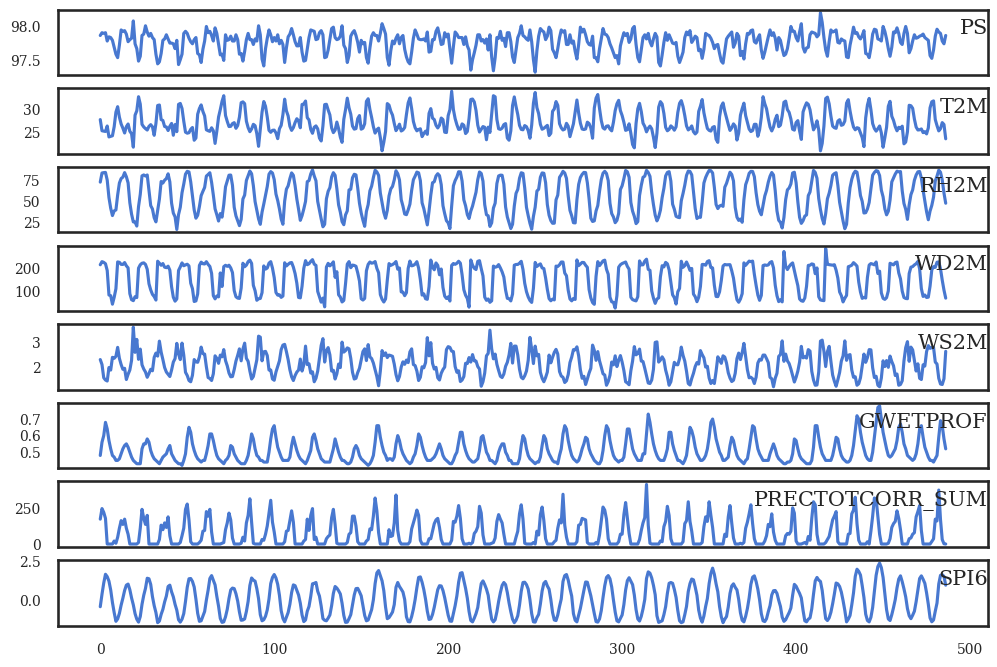

In [15]:
# specify columns to plot
groups = [0, 1, 2, 3, 4, 5, 6, 7]
i = 1
# plot each column
plt.figure(figsize=(12,8))
for group in groups:
 plt.subplot(len(groups), 1, i)
 plt.plot(data.values[:, group])
 plt.title(data.columns[group], y=0.5, loc='right')
 i += 1
plt.show()

#### Normalization
 The scale of the features are big comparatively to the target SPI6. Let's normalize those features 

In [16]:
target_column = 'SPI6'

In [17]:
feature_range = (-1, 1)

# Separate the target column from the other columns
features = data.drop(columns=[target_column])
target = data[target_column]

# Initialize and fit scaler on train data if needed
scaler_type = data_params['scaling_type']
if scaler_type == 'minmax':
    scaler = MinMaxScaler(feature_range=feature_range)
elif scaler_type == 'standard':
    scaler = StandardScaler()
elif scaler_type == 'none':
    scaler = None
else:
    raise ValueError(f"Unsupported scaler_type: {scaler_type}")

normalized_features = scaler.fit_transform(features)

# Convert the normalized features back to a DataFrame
normalized_features_df = pd.DataFrame(normalized_features, columns=features.columns, index=data.index)

# Reconstruct the DataFrame with the normalized columns and the target column
normalized_data = pd.concat([normalized_features_df, target], axis=1)

# Display the head of the new DataFrame
normalized_data.head()

,PS,T2M,RH2M,WD2M,WS2M,GWETPROF,PRECTOTCORR_SUM,SPI6
DATE,,,,,,,,
1981-06-30,0.232558,0.048212,0.589512,0.455487,-0.087866,-0.666667,-0.164570,-0.418536
1981-07-31,0.325581,-0.326594,0.895968,0.560323,-0.255230,-0.222222,0.189870,0.378208
1981-08-31,0.302326,-0.339036,0.908373,0.535660,-0.698745,0.000000,0.063274,1.090183
1981-09-30,0.325581,-0.349922,0.915421,0.489737,-0.774059,0.444444,-0.139222,1.649623
1981-10-31,0.046512,-0.166407,0.658303,0.262206,-0.807531,0.222222,-1.000000,1.497057


### Pearson Correlation

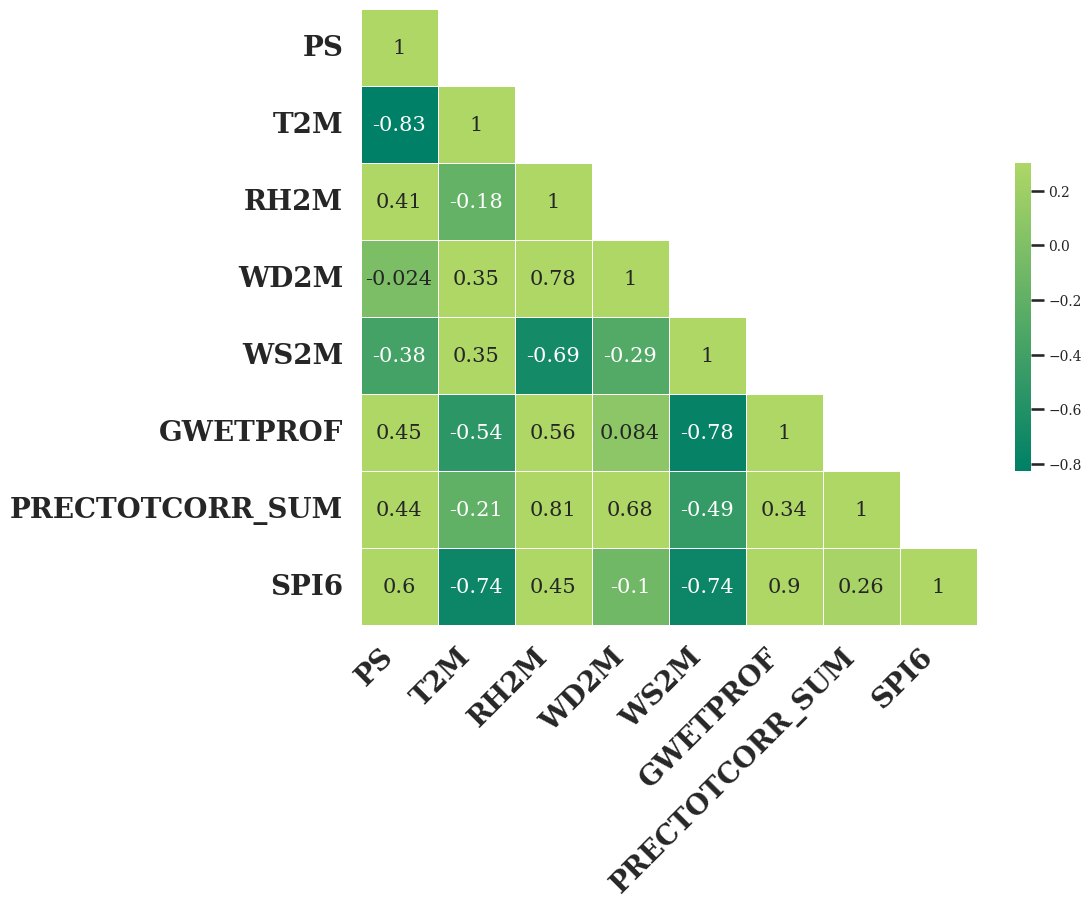

In [18]:
# Compute the correlation matrix
corr = normalized_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))
# plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
# cmap = sns.diverging_palette(230, 20, as_cmap=True)
cmap = 'summer'

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot_kws={"size":15})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right',fontsize=20, fontweight='bold')
ax.set_yticklabels(ax.get_yticklabels(),fontsize=20, fontweight='bold')
plt.savefig('heatmap correlation Pix1')

#### Let's focus on the corelations between each variable and target variable

In [19]:
correlations_data = normalized_data.corr()[target_column].sort_values(ascending=False)
correlations_data

SPI6               1.000000
GWETPROF           0.896679
PS                 0.601719
RH2M               0.445598
PRECTOTCORR_SUM    0.256338
WD2M              -0.103587
WS2M              -0.742100
T2M               -0.743709
Name: SPI6, dtype: float64

In [20]:
correlations_data = np.abs(normalized_data.corr()[target_column]).sort_values(ascending=False)
correlations_data

SPI6               1.000000
GWETPROF           0.896679
T2M                0.743709
WS2M               0.742100
PS                 0.601719
RH2M               0.445598
PRECTOTCORR_SUM    0.256338
WD2M               0.103587
Name: SPI6, dtype: float64

normalized_data = normalized_data.drop(columns=['WD2M'])
normalized_data.head()

No need of WD2M covariate removal compared to the previous dataset

In [21]:
no_lagged_data_path = data_params['data_path'] + 'no_lagged/' + data_params['city'] + '_no_lagged.csv'
normalized_data.to_csv(no_lagged_data_path)

### Transform dataset for Time series forecasting

In [25]:
import sys
sys.path.append('../')

from models.utils import create_lagged_features

In [26]:
col_names = list(normalized_data.columns)
print(col_names)

['PS', 'T2M', 'RH2M', 'WD2M', 'WS2M', 'GWETPROF', 'PRECTOTCORR_SUM', 'SPI6']


In [27]:
lagged_selected_columns = ['SPI6(t)']

In [28]:
lagged_data = create_lagged_features(data= normalized_data, 
                                      col_names=col_names,
                                      n_in=data_params['window_size'],
                                      n_out=data_params['n_output_steps'],
                                      dropnan=True)

lagged_data.head()

,PS(t-5),T2M(t-5),RH2M(t-5),WD2M(t-5),WS2M(t-5),GWETPROF(t-5),PRECTOTCORR_SUM(t-5),SPI6(t-5),PS(t-4),T2M(t-4),...,PRECTOTCORR_SUM(t-1),SPI6(t-1),PS(t),T2M(t),RH2M(t),WD2M(t),WS2M(t),GWETPROF(t),PRECTOTCORR_SUM(t),SPI6(t)
DATE,,,,,,,,,,,,,,,,,,,,,
1981-11-30,0.232558,0.048212,0.589512,0.455487,-0.087866,-0.666667,-0.164570,-0.418536,0.325581,-0.326594,...,-1.000000,1.497057,0.186047,-0.533437,0.069636,-0.560710,-0.355649,-0.166667,-1.000000,1.208867
1981-12-31,0.325581,-0.326594,0.895968,0.560323,-0.255230,-0.222222,0.189870,0.378208,0.302326,-0.339036,...,-1.000000,1.208867,0.162791,-0.514774,-0.286157,-0.582976,-0.439331,-0.444444,-1.000000,0.649458
1982-01-31,0.302326,-0.339036,0.908373,0.535660,-0.698745,0.000000,0.063274,1.090183,0.325581,-0.349922,...,-1.000000,0.649458,0.069767,-0.494557,-0.533127,-0.868027,-0.012552,-0.666667,-1.000000,-0.147286
1982-02-28,0.325581,-0.349922,0.915421,0.489737,-0.774059,0.444444,-0.139222,1.649623,0.046512,-0.166407,...,-1.000000,-0.147286,-0.162791,-0.191291,-0.376092,-0.636631,-0.046025,-0.722222,-0.898752,-0.791464
1982-03-31,0.046512,-0.166407,0.658303,0.262206,-0.807531,0.222222,-1.000000,1.497057,0.186047,-0.533437,...,-0.898752,-0.791464,-0.395349,0.298600,-0.344516,-0.350574,0.020921,-0.833333,-0.974700,-1.350905


### Now we have 48 columns. Lets reduce them

### Select the most useful lags. 

Let's plot correlation matrice by including for each the target TWS and others with a  given lag_lenth

In [29]:
normalized_data.columns

Index(['PS', 'T2M', 'RH2M', 'WD2M', 'WS2M', 'GWETPROF', 'PRECTOTCORR_SUM',
       'SPI6'],
      dtype='object')

In [30]:
lagged_data.columns

Index(['PS(t-5)', 'T2M(t-5)', 'RH2M(t-5)', 'WD2M(t-5)', 'WS2M(t-5)',
       'GWETPROF(t-5)', 'PRECTOTCORR_SUM(t-5)', 'SPI6(t-5)', 'PS(t-4)',
       'T2M(t-4)', 'RH2M(t-4)', 'WD2M(t-4)', 'WS2M(t-4)', 'GWETPROF(t-4)',
       'PRECTOTCORR_SUM(t-4)', 'SPI6(t-4)', 'PS(t-3)', 'T2M(t-3)', 'RH2M(t-3)',
       'WD2M(t-3)', 'WS2M(t-3)', 'GWETPROF(t-3)', 'PRECTOTCORR_SUM(t-3)',
       'SPI6(t-3)', 'PS(t-2)', 'T2M(t-2)', 'RH2M(t-2)', 'WD2M(t-2)',
       'WS2M(t-2)', 'GWETPROF(t-2)', 'PRECTOTCORR_SUM(t-2)', 'SPI6(t-2)',
       'PS(t-1)', 'T2M(t-1)', 'RH2M(t-1)', 'WD2M(t-1)', 'WS2M(t-1)',
       'GWETPROF(t-1)', 'PRECTOTCORR_SUM(t-1)', 'SPI6(t-1)', 'PS(t)', 'T2M(t)',
       'RH2M(t)', 'WD2M(t)', 'WS2M(t)', 'GWETPROF(t)', 'PRECTOTCORR_SUM(t)',
       'SPI6(t)'],
      dtype='object')

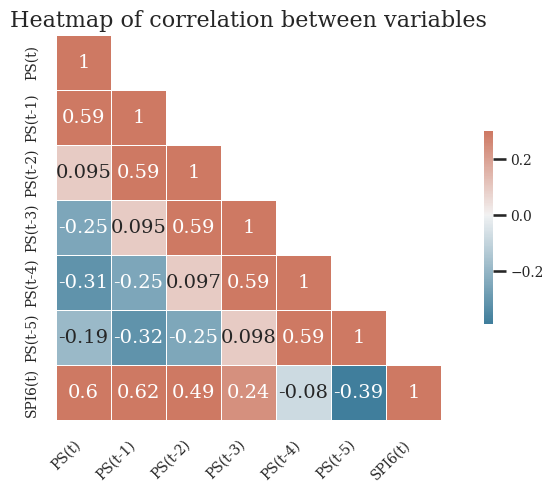

In [31]:
# Compute the correlation matrix : SPI6 and lag PS 

dfm1 = lagged_data[['PS(t)','PS(t-1)', 'PS(t-2)', 'PS(t-3)','PS(t-4)', 'PS(t-5)','SPI6(t)']]

corr = dfm1.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 5))
plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [32]:
np.abs(dfm1.corr()['SPI6(t)']).sort_values(ascending=False)

SPI6(t)    1.000000
PS(t-1)    0.618474
PS(t)      0.602076
PS(t-2)    0.490174
PS(t-5)    0.389197
PS(t-3)    0.242945
PS(t-4)    0.079603
Name: SPI6(t), dtype: float64

#####  The lag 1 : PS(t-1) is the most correlated. So, we only keep it.

In [33]:
lagged_selected_columns.append('PS(t-1)')

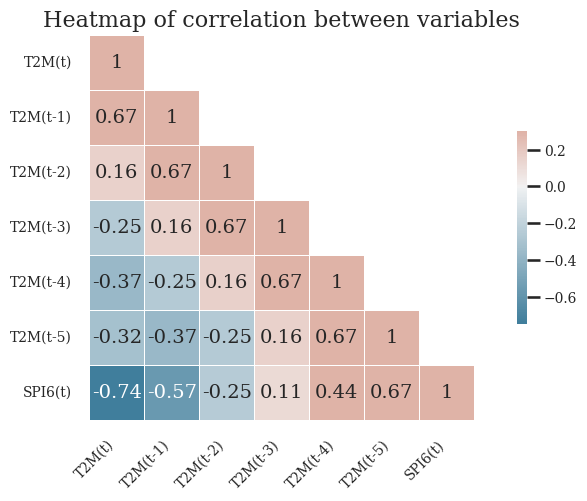

In [34]:
# Compute the correlation matrix : SPI6 and lag T2M

dfm2 = lagged_data[['T2M(t)','T2M(t-1)', 'T2M(t-2)', 'T2M(t-3)','T2M(t-4)', 'T2M(t-5)','SPI6(t)']]

corr = dfm2.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 5))
plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [35]:
np.abs(dfm2.corr()['SPI6(t)']).sort_values(ascending=False)

SPI6(t)     1.000000
T2M(t)      0.743918
T2M(t-5)    0.666294
T2M(t-1)    0.565294
T2M(t-4)    0.440855
T2M(t-2)    0.250386
T2M(t-3)    0.112119
Name: SPI6(t), dtype: float64

#### le lag 0 T2M(t) est le plus correlé avec 0.75

In [36]:
print(lagged_selected_columns), lagged_selected_columns.append('T2M(t)')

['SPI6(t)', 'PS(t-1)']


(None, None)

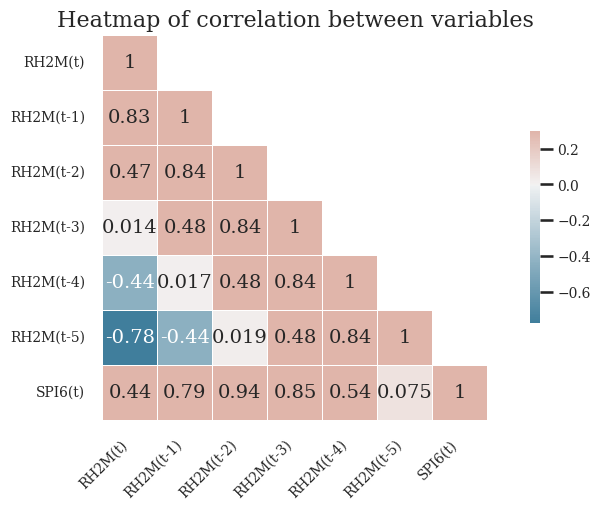

In [37]:
# Compute the correlation matrix : SPI6 and lag RH2M

dfm3 = lagged_data[['RH2M(t)','RH2M(t-1)', 'RH2M(t-2)', 'RH2M(t-3)','RH2M(t-4)', 'RH2M(t-5)','SPI6(t)']]

corr = dfm3.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 5))
plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [38]:
np.abs(dfm3.corr()['SPI6(t)']).sort_values(ascending=False)

SPI6(t)      1.000000
RH2M(t-2)    0.939660
RH2M(t-3)    0.848952
RH2M(t-1)    0.792865
RH2M(t-4)    0.536412
RH2M(t)      0.441131
RH2M(t-5)    0.075209
Name: SPI6(t), dtype: float64

le lag 2 RH2M(t-2) est le plus correlé avec un coefficient de     0.93

In [39]:
lagged_selected_columns.append('RH2M(t-2)')

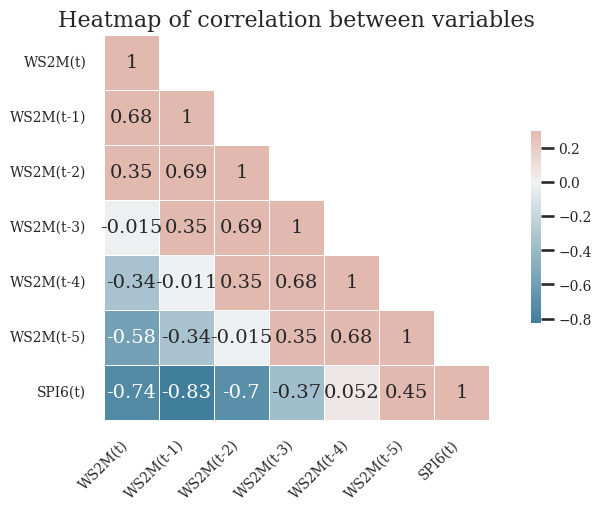

In [40]:
# Compute the correlation matrix : SPI6 and lag WS2M

dfm4 = lagged_data[['WS2M(t)','WS2M(t-1)', 'WS2M(t-2)', 'WS2M(t-3)','WS2M(t-4)', 'WS2M(t-5)','SPI6(t)']]

corr = dfm4.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 5))
plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [41]:
np.abs(dfm4.corr()['SPI6(t)']).sort_values(ascending=False)

SPI6(t)      1.000000
WS2M(t-1)    0.828360
WS2M(t)      0.739278
WS2M(t-2)    0.697460
WS2M(t-5)    0.447087
WS2M(t-3)    0.372897
WS2M(t-4)    0.052399
Name: SPI6(t), dtype: float64

le lag 1 WS2M(t-1)  est le plus correlé avec SPI6(t)  : 0.82

In [42]:
lagged_selected_columns.append('WS2M(t-1)')

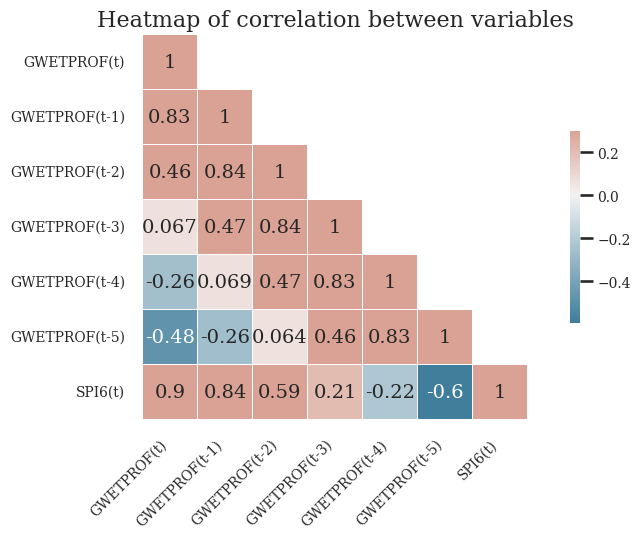

In [43]:
# Compute the correlation matrix : SPI6 and lag GWETPROF

dfm5 = lagged_data[['GWETPROF(t)','GWETPROF(t-1)', 'GWETPROF(t-2)', 'GWETPROF(t-3)','GWETPROF(t-4)', 'GWETPROF(t-5)','SPI6(t)']]

corr = dfm5.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 5))
plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [44]:
np.abs(dfm5.corr()['SPI6(t)']).sort_values(ascending=False)

SPI6(t)          1.000000
GWETPROF(t)      0.895821
GWETPROF(t-1)    0.838278
GWETPROF(t-5)    0.595413
GWETPROF(t-2)    0.588386
GWETPROF(t-4)    0.222654
GWETPROF(t-3)    0.208960
Name: SPI6(t), dtype: float64

le lag 0 est le plus correlé : GWETPROF(t)      0.89

In [45]:
lagged_selected_columns.append('GWETPROF(t)')

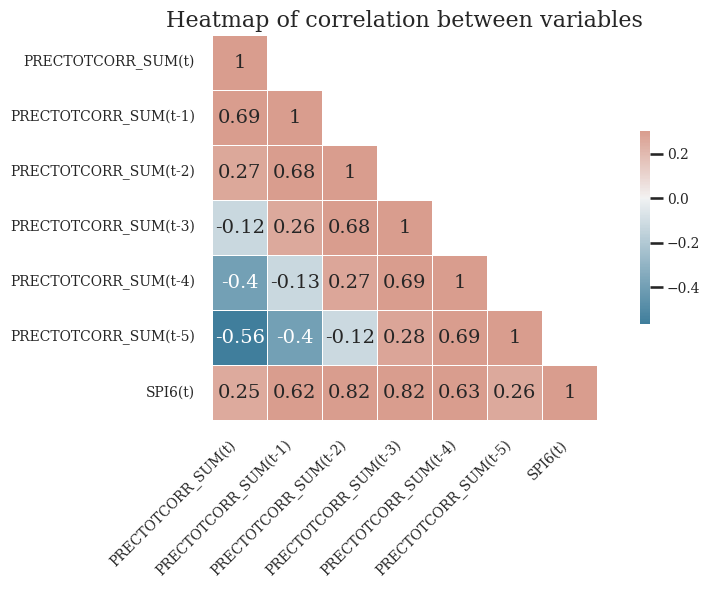

In [46]:
# Compute the correlation matrix : SPI6 and lag PRECTOTCORR_SUM

dfm6 = lagged_data[['PRECTOTCORR_SUM(t)','PRECTOTCORR_SUM(t-1)', 'PRECTOTCORR_SUM(t-2)', 
                    'PRECTOTCORR_SUM(t-3)','PRECTOTCORR_SUM(t-4)', 'PRECTOTCORR_SUM(t-5)','SPI6(t)']]

corr = dfm6.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 5))
plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [47]:
np.abs(dfm6.corr()['SPI6(t)']).sort_values(ascending=False)

SPI6(t)                 1.000000
PRECTOTCORR_SUM(t-3)    0.820169
PRECTOTCORR_SUM(t-2)    0.818604
PRECTOTCORR_SUM(t-4)    0.625251
PRECTOTCORR_SUM(t-1)    0.620357
PRECTOTCORR_SUM(t-5)    0.260623
PRECTOTCORR_SUM(t)      0.254896
Name: SPI6(t), dtype: float64

le lag 3 est le plus correllé PRECTOTCORR_SUM(t-3)    0.82

In [48]:
lagged_selected_columns.append('PRECTOTCORR_SUM(t-3)')

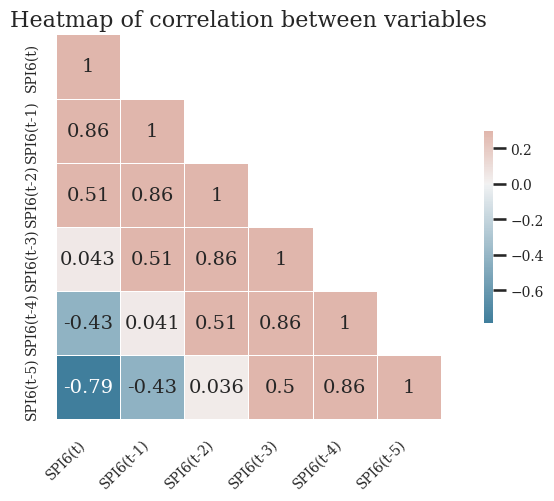

In [49]:
# Compute the correlation matrix : SPI6 and lag SPI6

dfm7 = lagged_data[['SPI6(t)','SPI6(t-1)', 'SPI6(t-2)', 
                    'SPI6(t-3)','SPI6(t-4)', 'SPI6(t-5)']]

corr = dfm7.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 5))
plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [50]:
np.abs(dfm7.corr()['SPI6(t)']).sort_values(ascending=False)

SPI6(t)      1.000000
SPI6(t-1)    0.861900
SPI6(t-5)    0.785328
SPI6(t-2)    0.510046
SPI6(t-4)    0.427617
SPI6(t-3)    0.042703
Name: SPI6(t), dtype: float64

##### le lag 1 est le plus correllé SPI6(t-1)    0.86

In [51]:
lagged_selected_columns.append('SPI6(t-1)')

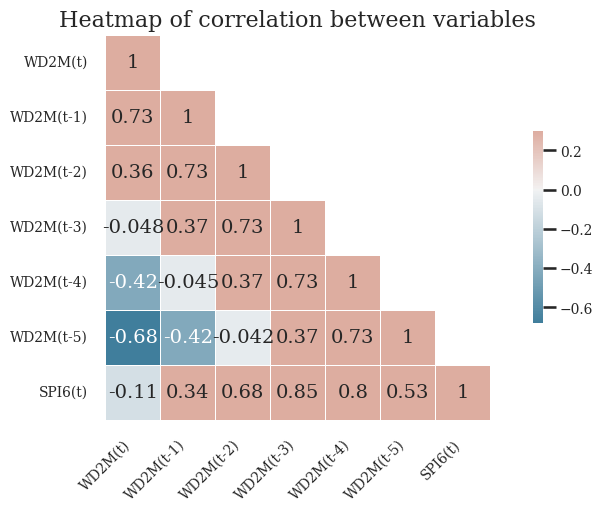

In [52]:
# Compute the correlation matrix : SPI6 and lag SPI6

dfm8 = lagged_data[['WD2M(t)','WD2M(t-1)', 'WD2M(t-2)', 
                    'WD2M(t-3)','WD2M(t-4)', 'WD2M(t-5)', 'SPI6(t)']]
corr = dfm8.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 5))
plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [53]:
np.abs(dfm8.corr()['SPI6(t)']).sort_values(ascending=False)

SPI6(t)      1.000000
WD2M(t-3)    0.850460
WD2M(t-4)    0.800709
WD2M(t-2)    0.683282
WD2M(t-5)    0.527809
WD2M(t-1)    0.335809
WD2M(t)      0.111899
Name: SPI6(t), dtype: float64

##### The 3rd lag has the highest correlation of 0.85

In [54]:
lagged_selected_columns.append('WD2M(t-3)')

New dataset by choosing each  new lag

In [55]:
#lagged_selected_columns, 
len(lagged_selected_columns)

9

In [56]:
print(lagged_selected_columns)

['SPI6(t)', 'PS(t-1)', 'T2M(t)', 'RH2M(t-2)', 'WS2M(t-1)', 'GWETPROF(t)', 'PRECTOTCORR_SUM(t-3)', 'SPI6(t-1)', 'WD2M(t-3)']


In [57]:
final_lagged_data = lagged_data[lagged_selected_columns] 

final_lagged_data

,SPI6(t),PS(t-1),T2M(t),RH2M(t-2),WS2M(t-1),GWETPROF(t),PRECTOTCORR_SUM(t-3),SPI6(t-1),WD2M(t-3)
DATE,,,,,,,,,
1981-11-30,1.208867,0.046512,-0.533437,0.915421,-0.807531,-0.166667,0.063274,1.497057,0.535660
1981-12-31,0.649458,0.186047,-0.514774,0.658303,-0.355649,-0.444444,-0.139222,1.208867,0.489737
1982-01-31,-0.147286,0.162791,-0.494557,0.069636,-0.439331,-0.666667,-1.000000,0.649458,0.262206
1982-02-28,-0.791464,0.069767,-0.191291,-0.286157,-0.012552,-0.722222,-1.000000,-0.147286,-0.560710
1982-03-31,-1.350905,-0.162791,0.298600,-0.533127,-0.046025,-0.833333,-1.000000,-0.791464,-0.582976
...,...,...,...,...,...,...,...,...,...
2021-08-31,1.028912,0.441860,-0.331260,0.628136,-0.238494,-0.055556,-0.825876,-0.184415,0.393096
2021-09-30,1.579705,0.348837,-0.256610,0.790245,-0.715481,0.500000,-0.164522,1.028912,0.369438
2021-10-31,1.624260,0.302326,-0.052877,0.991260,-0.907950,0.333333,-0.224724,1.579705,0.539990


In [58]:
lagged_data_path = data_params['data_path'] + 'lagged/' + data_params['city'] + '_lagged.csv'
final_lagged_data.to_csv(lagged_data_path)

In [63]:
pd.read_csv('../datasets/lagged/Kandi_lagged.csv')

,DATE,SPI6(t),PS(t-1),T2M(t),RH2M(t-2),WS2M(t-1),GWETPROF(t),PRECTOTCORR_SUM(t-3),SPI6(t-1),WD2M(t-3)
0,1981-11-30,1.208867,0.046512,-0.533437,0.915421,-0.807531,-0.166667,0.063274,1.497057,0.535660
1,1981-12-31,0.649458,0.186047,-0.514774,0.658303,-0.355649,-0.444444,-0.139222,1.208867,0.489737
2,1982-01-31,-0.147286,0.162791,-0.494557,0.069636,-0.439331,-0.666667,-1.000000,0.649458,0.262206
3,1982-02-28,-0.791464,0.069767,-0.191291,-0.286157,-0.012552,-0.722222,-1.000000,-0.147286,-0.560710
4,1982-03-31,-1.350905,-0.162791,0.298600,-0.533127,-0.046025,-0.833333,-1.000000,-0.791464,-0.582976
...,...,...,...,...,...,...,...,...,...,...
477,2021-08-31,1.028912,0.441860,-0.331260,0.628136,-0.238494,-0.055556,-0.825876,-0.184415,0.393096
478,2021-09-30,1.579705,0.348837,-0.256610,0.790245,-0.715481,0.500000,-0.164522,1.028912,0.369438
479,2021-10-31,1.624260,0.302326,-0.052877,0.991260,-0.907950,0.333333,-0.224724,1.579705,0.539990
480,2021-11-30,1.513484,0.046512,-0.116641,0.922470,-0.924686,-0.111111,0.812002,1.624260,0.550118
